# Introduction

- **This dataset contains data for a furniture company that has two categories (Furniture ,Office Supplies) and each category has sub-categories and this data is for analytical only**

# Questions

- Analyize all sales profit
- What is the profit for each year , season
- What is the profit from each Country ,market
- The best profitable subcategory and the worst subcategory
- top 5 products
- Countries that have made profits every year and Countries that have not made profits in all years

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3)

import warnings
warnings.filterwarnings('ignore')

# loading dataset and print out a few lines perform operation to inspect data


## General Properties

In [6]:
import os
import sys
os.path.dirname(sys.executable)

'C:\\Users\\hp\\anaconda3'

In [9]:
# loading sales dataset
Sales=pd.read_excel('C:\\Users\\hp\\sales.xlsx')
Sales

,Salary,Role
0,2000,Senior
1,2300,Senior
2,2600,Senior
3,2900,Senior
4,3200,Senior
5,3500,Senior
6,3800,Senior
7,4100,Senior
8,4400,Senior
9,4700,TL


In [8]:
# loading Customer dataset
Customer=pd.read_excel('C:\\Users\\hp\\Customer.xlsx')
Customer

,CustomerKey,Customer,StateName,Country,Region,Market,BusinessType
0,56,Joseph Holt,New South Wales,Australia,Oceania,APAC,Consumer
1,57,Eugene Moren,Stockholm,Sweden,North,EU,Home Office
2,58,Annie Thurman,Budapest,Hungary,EMEA,EMEA,Consumer
3,59,Toby Braunhardt,Constantine,Algeria,Africa,Africa,Consumer
4,60,Nat Gilpin,Razavi Khorasan,Iran,EMEA,EMEA,Corporate
...,...,...,...,...,...,...,...
18799,18855,Marina Lichtenstein,Jakarta,Indonesia,Southeast Asia,APAC,Corporate
18800,18856,Ken Lonsdale,Luanda,Angola,Africa,Africa,Consumer
18801,18857,Valerie Dominguez,Konya,Turkey,EMEA,EMEA,Consumer
18802,18858,Liz Preis,Souss-Massa-Draâ,Morocco,Africa,Africa,Consumer


In [3]:
# merge two datasets together 
df= pd.merge(Sales,Customer ,how='left',on='CustomerKey')
df

NameError: name 'Sales' is not defined

In [5]:
#exploring the shape of data 
df.shape

(29999, 20)

***Data consist of 29999 order ( rows) and 20 columns***


In [6]:
# check for any missing values or wrong dtpye 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29999 entries, 0 to 29998
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   SalesOrderNumber  29999 non-null  object        
 1   OrderDate         29999 non-null  datetime64[ns]
 2   DeliveryDate      29829 non-null  datetime64[ns]
 3   ShipMode          29999 non-null  object        
 4   CustomerKey       29999 non-null  int64         
 5   ProductKey        23109 non-null  object        
 6   CategoryName      29999 non-null  object        
 7   SubcategoryName   29999 non-null  object        
 8   ProductName       29999 non-null  object        
 9   UnitPrice         29974 non-null  float64       
 10  OrderQuantity     29999 non-null  int64         
 11  Discount %        29999 non-null  float64       
 12  ShippingCost      29999 non-null  float64       
 13  OrderPriority     29941 non-null  object        
 14  Customer          2956

**Problems**
- **missing values in :**
- Categorical

  - Region, BusinessType and DeliveryDate , Market, Country , StateName , Customer    

- Numerical
    - missing values in UnitPrice  ,ProductKey

In [7]:
# check for duplications
df.duplicated().mean()

0.0

##### no duplicate data 

In [8]:
# check for missing values 
df.isna().mean() 

SalesOrderNumber    0.000000
OrderDate           0.000000
DeliveryDate        0.005667
ShipMode            0.000000
CustomerKey         0.000000
ProductKey          0.229674
CategoryName        0.000000
SubcategoryName     0.000000
ProductName         0.000000
UnitPrice           0.000833
OrderQuantity       0.000000
Discount %          0.000000
ShippingCost        0.000000
OrderPriority       0.001933
Customer            0.014434
StateName           0.014434
Country             0.014434
Region              0.014434
Market              0.014434
BusinessType        0.014434
dtype: float64

####  will be handled in the cleaning stage

In [9]:
# some information about our numerical data
num_data=df.describe()[['UnitPrice','OrderQuantity','Discount %','ShippingCost']]
round(num_data.loc[['mean','min','25%','50%','75%','max']],2)

,UnitPrice,OrderQuantity,Discount %,ShippingCost
mean,79.32,3.48,0.39,30.35
min,1.39,1.00,0.00,0.00
25%,15.74,2.00,0.20,3.63
50%,33.54,3.00,0.40,9.51
75%,81.96,5.00,0.60,27.21
max,1889.99,16.00,0.80,1581.51


- ***UnitPrice Mean -> 79.32 , max -> 1889.99 , min -> 1.39 about 50% of UnitPrice between 15.74 and 81.96***
- ***OrderQuantity Mean -> 3 , max -> 16 , min -> 1 about 50% of OrderQuantity between 2 and 5***
- ***ShippingCost Mean -> 30.35 , max -> 1581.51 , min -> 0 about 50% of OrderQuantity between 3.63 and 27.21***


In [10]:
# some information about our catrgorical data
cat_data=df.describe(include='all').select_dtypes(include='object')
cat_data.loc[['count','unique','top','freq']]

,SalesOrderNumber,OrderDate,DeliveryDate,ShipMode,ProductKey,CategoryName,SubcategoryName,ProductName,OrderPriority,Customer,StateName,Country,Region,Market,BusinessType
count,29999,29999,29829,29999,23109,29999,29999,29999,29941,29566,29566,29566,29566,29566,29566
unique,17801,1406,1455,4,5488,2,10,2432,4,795,962,133,13,7,3
top,MX-2019-127705,2020-06-18 00:00:00,2020-12-19 00:00:00,Standard Class,OFF-AR-10003651,Office Supplies,Binders,Staples,Medium,Muhammed Yedwab,California,United States,Central,EU,Consumer
freq,12,82,65,17991,35,21421,5475,111,17214,71,1266,5985,6495,6702,15290


- **SalesOrderNumber : unique values -> 17801**
- **OrderDate : unique values -> 1406 from 1460 (4*365 day) = 54 day not orderd, top -> 2020-06-18 , freq-> 82 , i will check   for this day**
- **DeliveryDate : unique values -> 1455 from 1460 (4*365 day)  , top -> 2020-12-19, freq-> 65** 

# --------------------------------------------------------------------------------------------------------------
### - General look for numerical data

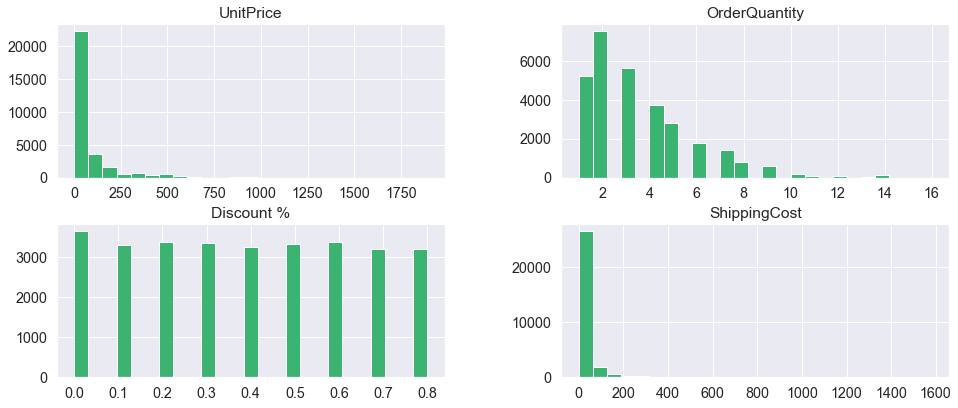

In [11]:
df.hist(column=['UnitPrice','OrderQuantity','Discount %','ShippingCost'],figsize=(16,6.5),bins=25,color='MediumSeaGreen');

### - UnitPrice
 - **Most customers buy products in the range of 1.39 to 81.96**
 - **And Almost few customers buy when unit price> 200 , that means that the purchasing power of customers is low and that more discounts must be made on high commodities to familiarize customers with these products and form a good relationship with them, and then prices can rise and choose a good sales team to market these products**

In [12]:
# number of sales order when unitprice > 200
df[df['UnitPrice']>200]['SalesOrderNumber'].describe()[:2]

count     2952
unique    2761
Name: SalesOrderNumber, dtype: object

- **when unit price > 200  the numbers of order 2761 from 17801 (unique SalesOrderNumber)**


### - OrderQuantity
- **Most customers buy quantity 2, and the quantity is clearly reduced after quantity 3**

In [13]:
print('Number of sales order when OrderQuantity >= 6 ')
print(df[df['OrderQuantity']>=6]['SalesOrderNumber'].describe()[:2])

Number of sales order when OrderQuantity >= 6 
count     5063
unique    4508
Name: SalesOrderNumber, dtype: object


### - Discount
- **The distribution of discounts is similar, as there is no significant difference**

### - ShippingCost
- **about 50% of ShippingCost between 3.6300 and 27.2115**

In [14]:
#check for min ,max 
df['ShippingCost'].describe()[3:]

min       0.0020
25%       3.6300
50%       9.5090
75%      27.2115
max    1581.5100
Name: ShippingCost, dtype: float64

In [15]:
# number of sales order when ShippingCost > 150
df[df['ShippingCost']>150]['SalesOrderNumber'].describe()[:2]

count     1174
unique    1142
Name: SalesOrderNumber, dtype: object

- **when ShippingCost > 150  the numbers of order 1142 from 17801 (unique SalesOrderNumber)**
- **It is noted that the higher the shipping price, the fewer orders**
## -------------------------------------------------------------------------------------------------------------------------------

### UnitPrice

In [16]:
# check for unitprice in countries by [max,min,count,mean] 
round(df.groupby(['Country']).describe()['UnitPrice'][['max','min','count','mean']].sort_values(ascending=False,by=['mean']),2)

,max,min,count,mean
Country,,,,
Taiwan,857.58,15.15,10.0,215.25
Montenegro,539.04,10.53,4.0,200.25
Lebanon,469.68,6.33,6.0,193.88
Estonia,560.97,13.11,10.0,172.12
Republic of the Congo,415.20,5.70,6.0,161.24
...,...,...,...,...
Paraguay,71.38,4.46,4.0,35.55
Georgia,127.47,10.08,24.0,35.33
Guinea-Bissau,58.32,17.88,3.0,34.14


**- I checked by [max,min,count,mean]** 
- **by average in Taiwan   => 215.25 but this is fake because  it contains a small count --> 10**
- **by count in  United States	=> 5981.0**
- **by min in United States => 1.39**
- **by max in United States => 1889.99**

In [17]:
# shows the lowest unitprice
df[df['UnitPrice']==df['UnitPrice'].min()][['Country','Region','SubcategoryName','ProductName','UnitPrice','OrderQuantity','BusinessType']]

,Country,Region,SubcategoryName,ProductName,UnitPrice,OrderQuantity,BusinessType
11631,United States,East,Art,Design Ebony Sketching Pencil,1.39,2,Consumer
14118,United States,Central,Art,Design Ebony Sketching Pencil,1.39,6,Corporate
14554,United States,West,Art,Design Ebony Sketching Pencil,1.39,3,Corporate


#### I noticed that the region data records United States in (West (US), East (US), Central (US 3) and South (Top US))


In [18]:
# check for the Region of United States
df[df['Country'] == 'United States']['Region'].value_counts()

West       1976
East       1706
Central    1358
South       945
Name: Region, dtype: int64

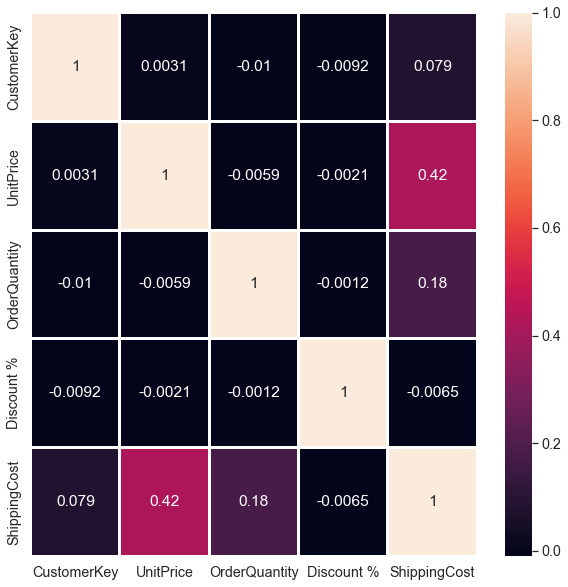

In [19]:
# check for corr 
sns.heatmap(df.corr(), annot=True ,linecolor='white', linewidths=2)

- correlation between price and shipping 

# --------------------------------------------------------------------------------------------------------------
 ### - General look for categorical data
##                   ⇩

- **SalesOrderNumber**

In [20]:
# check for Sales order quantity for each business type
df.groupby(['BusinessType']).describe(include='all')['SalesOrderNumber'][['count','unique']]

,count,unique
BusinessType,,
Consumer,15290,9110
Corporate,8917,5427
Home Office,5359,3272


***Total orders for***
- Consumer -> 9110
- Corporate -> 5427
- Home Office -> 3272

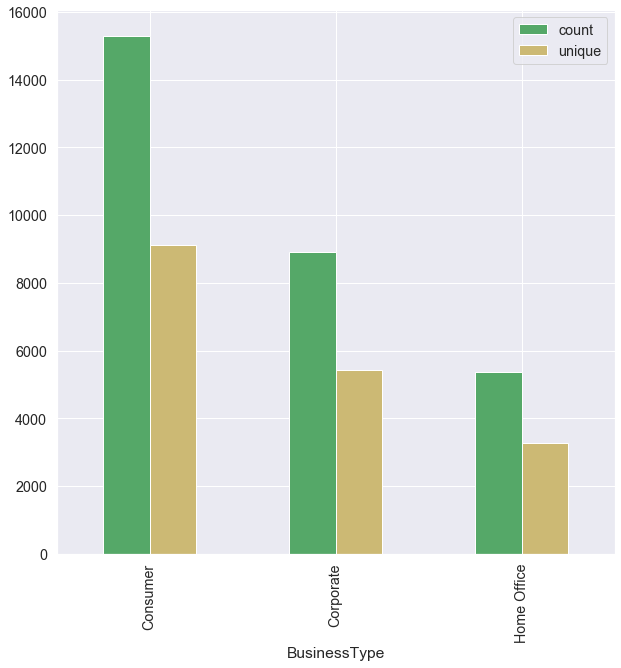

In [21]:
# check for Sales order quantity for each business type
groups=df.groupby(['BusinessType']).describe(include='all')['SalesOrderNumber'][['count','unique']]
groups.plot.bar(color=['g','y'])
plt.show()

# -------------------------------------------------------------------------------------------------------------
- **OrderDate**

In [22]:
# check for the highest day contains orderes (82)
order_date=df[df['OrderDate']=='2020-06-18 00:00:00'][['SalesOrderNumber','Customer','CategoryName','SubcategoryName','UnitPrice','OrderQuantity','Discount %','ShippingCost','Country','BusinessType']]
order_date

,SalesOrderNumber,Customer,CategoryName,SubcategoryName,UnitPrice,OrderQuantity,Discount %,ShippingCost,Country,BusinessType
6661,CA-2020-118437,Philip Fox,Furniture,Furnishings,51.75,3,0.6,48.56,United States,Consumer
6662,CA-2020-4720,Nat Carroll,Furniture,Chairs,84.72,1,0.3,2.92,Canada,Consumer
6663,IT-2020-5245370,Troy Staebel,Furniture,Furnishings,25.29,2,0.0,11.08,United Kingdom,Consumer
6664,IN-2020-66755,Theone Pippenger,Furniture,Chairs,463.92,2,0.1,148.32,Australia,Consumer
6665,IN-2020-17426,Darrin Sayre,Furniture,Bookcases,143.97,6,0.8,131.94,India,Home Office
...,...,...,...,...,...,...,...,...,...,...
26806,CA-2020-118437,Philip Fox,Office Supplies,Storage,14.03,1,0.7,1.96,United States,Consumer
29493,ES-2020-3931503,Mitch Willingham,Office Supplies,Supplies,13.80,1,0.6,5.06,United Kingdom,Corporate
29494,IN-2020-66755,Theone Pippenger,Office Supplies,Supplies,22.56,5,0.5,10.72,Australia,Consumer
29495,ID-2020-65754,Jeremy Pistek,Office Supplies,Supplies,38.37,3,0.1,14.45,Australia,Consumer


# ---------------------------------------------------------------------------------------------
- ***ShipMode***

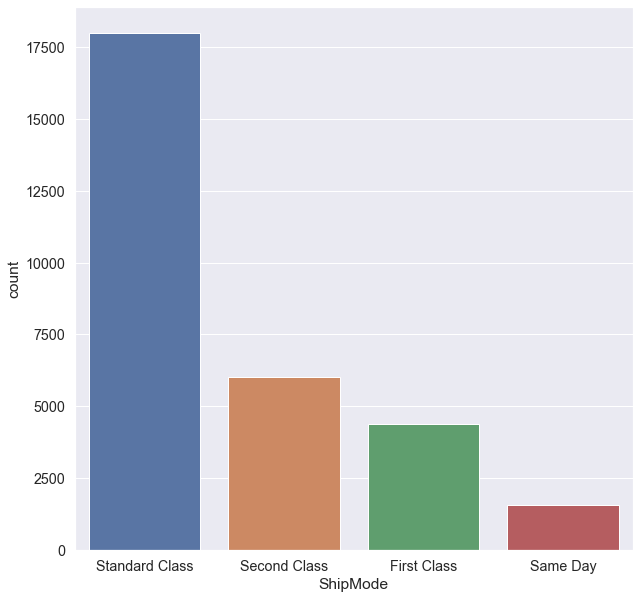

In [23]:
# check for unique values and Most selectable mode
sns.countplot(data=df,x='ShipMode')

- **Standard Class  -> 17991**
- **Second Class    ->  6019**
- **First Class     -> 4401**
- **Same Day        ->  1588**

# --------------------------------------------------------------------------------------------------------------
- **CategoryName**

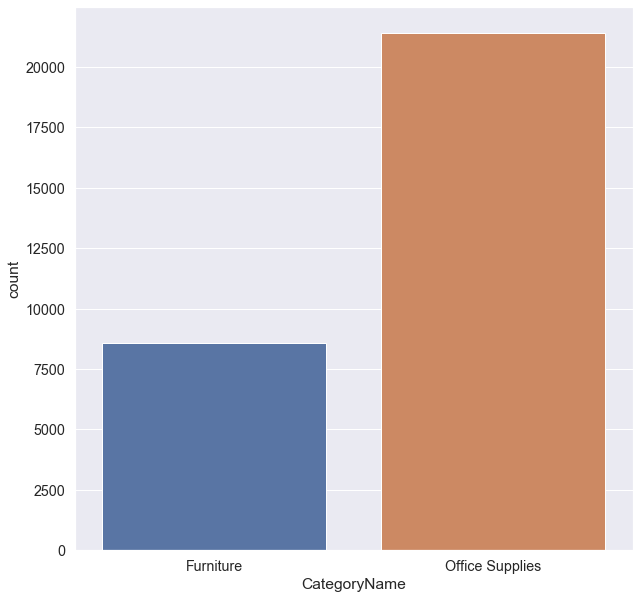

In [24]:
# check for unique values and Most selectable mode
sns.countplot(data=df,x='CategoryName')

**Office Supplies most selling category**
- Office Supplies ==>  21421
- Furniture ==>   8578

# --------------------------------------------------------------------------------------------------------------
 **SubcategoryName**

In [25]:
# check for subcategory counts
df['SubcategoryName'].value_counts()

Binders        5475
Storage        4579
Art            4473
Paper          3139
Chairs         2975
Furnishings    2755
Supplies       2197
Bookcases      2141
Appliances     1558
Tables          707
Name: SubcategoryName, dtype: int64

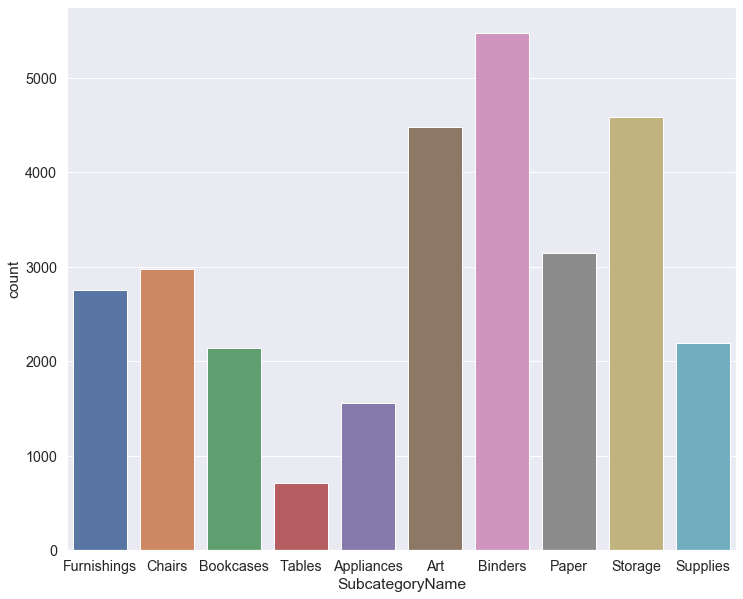

In [26]:
##  Check for the most selling subcategories of each category
sns.set(rc={'figure.figsize': [12, 10]}, font_scale=1.3)
sns.countplot(data=df,x='SubcategoryName')

- **The best SubcategoryName**
 - Furniture : Chairs ==> 2975
 - Office Supplies : Binders ==> 5475   
- **The worst SubcategoryName**
 - Furniture : tables ==> 707
 - Office Supplies : Appliances ==> 1558
- ***The reason is that these products don't sell much -> there is no good marketing team or there are problems in the product***

# ---------------------------------------------------------------------------------------------------------------
- **ProductName**

In [27]:
# Top 5 Products and number of unique values
print(df['ProductName'].value_counts().head())

Staples                                  111
Cardinal Index Tab, Clear                 87
Eldon File Cart, Single Width             84
Ibico Index Tab, Clear                    76
Sanford Pencil Sharpener, Water Color     76
Name: ProductName, dtype: int64


In [28]:
# check for top product --> Staples
products=df[df['ProductName']== 'Staples'][['Country','CategoryName','SubcategoryName','UnitPrice','OrderQuantity','ShippingCost']]
products

,Country,CategoryName,SubcategoryName,UnitPrice,OrderQuantity,ShippingCost
601,United States,Furniture,Furnishings,9.74,8,3.84
1247,United States,Furniture,Furnishings,7.96,2,1.20
1267,United States,Furniture,Furnishings,7.96,3,0.94
1901,United States,Furniture,Furnishings,7.96,7,308.88
2932,United States,Furniture,Furnishings,9.74,3,2.72
...,...,...,...,...,...,...
29695,United States,Office Supplies,Supplies,3.68,3,0.75
29866,United States,Office Supplies,Supplies,3.68,1,15.12
29880,United States,Office Supplies,Supplies,2.18,2,1.98
29913,United States,Office Supplies,Supplies,2.18,2,15.58


In [29]:
# check for highest UnitPrice
products['UnitPrice'].max()

61.72

In [30]:
# check for types of SubcategoryName
products['SubcategoryName'].value_counts()

Paper          40
Furnishings    16
Art            15
Supplies       15
Appliances     10
Storage         9
Binders         6
Name: SubcategoryName, dtype: int64

In [31]:
# check for Country
products['Country'].value_counts()

United States    111
Name: Country, dtype: int64

- **Staples --> The reason for the high request for this product  because its highest price is 61.72 and the prices vary due to the different categories and subcategory but this product It's only ordered in the USA so we can't say  that this product is the best-selling in the world**

 - **I checked  top 4 other products and found that the order is from different countries**

# -------------------------------------------------------------------------------------------------------------
### OrderPriority

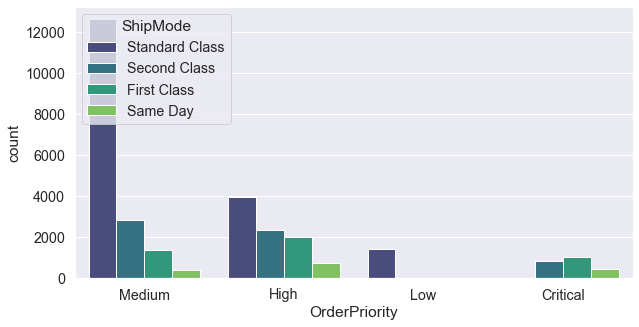

In [32]:
# Check for Types of Order Priority
sns.set(rc={'figure.figsize': [10, 5]}, font_scale=1.3)
sns.countplot(data=df, x='OrderPriority',hue='ShipMode',palette='viridis')

- **4 unique values and high Cardinality in Medium**
- **Medium and High contains all ships mode**
- **Low inculde only satandrd class**
- **Critical contains seconed, first, same day**

# -------------------------------------------------------------------------------------------------------------
### - Customer

In [33]:
# cheak for top 20 customers 
df.groupby(['Customer','BusinessType']).describe(include='all')['Country'][['count','top','freq']].sort_values(ascending=False,by=['count']).head(20)

,,count,top,freq
Customer,BusinessType,,,
Muhammed Yedwab,Corporate,71,United States,13
John Grady,Corporate,64,Germany,8
Harry Greene,Consumer,62,United States,9
Bill Eplett,Home Office,62,Australia,8
Art Ferguson,Consumer,62,United States,9
Patrick O'Brill,Consumer,61,United States,12
Gary Hwang,Consumer,59,United States,7
Eugene Moren,Home Office,59,United States,13
Natalie Fritzler,Consumer,58,China,8


In [34]:
# check for customer name for know his BusinessType
df[df['Customer']=='Muhammed Yedwab']['BusinessType'].value_counts()

Corporate    71
Name: BusinessType, dtype: int64

In [35]:
# check for SalesOrderNumber , CustomerKey and Country           
df[df['Customer']=='Muhammed Yedwab'][['SalesOrderNumber','CustomerKey','Country']].value_counts().head()

SalesOrderNumber  CustomerKey  Country  
IN-2018-40029     3756         China        9
MX-2020-167493    17644        Mexico       6
MX-2020-124744    18512        Nicaragua    6
ES-2017-2613634   2025         Austria      5
EG-2019-2110      10493        Egypt        4
dtype: int64

- **I noticed that these customers don't have the same customer key or the same country but each customer has the same Business Type and each SalesOrderNumber have diffrenet customer key**

In [36]:
# check for each SalesOrderNumber 
df[df['SalesOrderNumber']=='IN-2018-40029'][['Customer','Country','ShipMode','CategoryName','SubcategoryName','OrderPriority']]

,Customer,Country,ShipMode,CategoryName,SubcategoryName,OrderPriority
1606,Muhammed Yedwab,China,Standard Class,Furniture,Chairs,Medium
1607,Muhammed Yedwab,China,Standard Class,Furniture,Furnishings,Medium
1608,Muhammed Yedwab,China,Standard Class,Furniture,Furnishings,Medium
1609,Muhammed Yedwab,China,Standard Class,Furniture,Chairs,Medium
1612,Muhammed Yedwab,China,Standard Class,Furniture,Chairs,Medium
8890,Muhammed Yedwab,China,Standard Class,Office Supplies,Appliances,Medium
15616,Muhammed Yedwab,China,Standard Class,Office Supplies,Binders,Medium
24105,Muhammed Yedwab,China,Standard Class,Office Supplies,Storage,Medium
24106,Muhammed Yedwab,China,Standard Class,Office Supplies,Storage,Medium


# -------------------------------------------------------------------------------------------------------------
### Country , Region , Market and StateName

- **Country**

In [37]:
# cheak for top 10 countries
df['Country'].value_counts().head(10)

United States     5985
France            1892
Australia         1661
Mexico            1383
Germany           1371
China             1127
United Kingdom    1071
India              896
Indonesia          808
Turkey             788
Name: Country, dtype: int64

- **Market**

 - **7 markets**
 - EU  => European Union
 - APAC = East and South Asia, Southeast Asia and Oceania
 - US =>  United States
 - LATAM  => Latin america
 - EMEA => Europe, Middle East and Africa

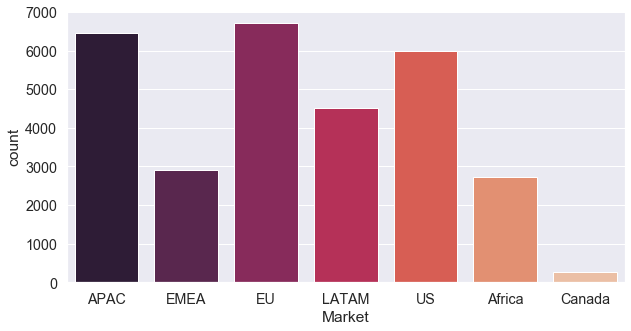

In [38]:
# check for top  and low market
sns.countplot(x="Market", data=df, palette='rocket')

#### -The highest market in the EU (  European Union  ) and APAC( East and South Asia, Southeast Asia and Oceania  ) and the lowest market in Canada 
#### - It is clearly not known in the Middle East ,African countries and canada, so more advertising, marketing and offers should be done to increase its sales

- **Region**

In [39]:
# cheak for top Numbers of Region 
df['Region'].value_counts()

Central           6495
South             3504
EMEA              2897
North             2782
Africa            2734
Oceania           2033
West              1976
Southeast Asia    1839
East              1706
North Asia        1401
Central Asia      1189
Caribbean          749
Canada             261
Name: Region, dtype: int64

### - Top region is central 

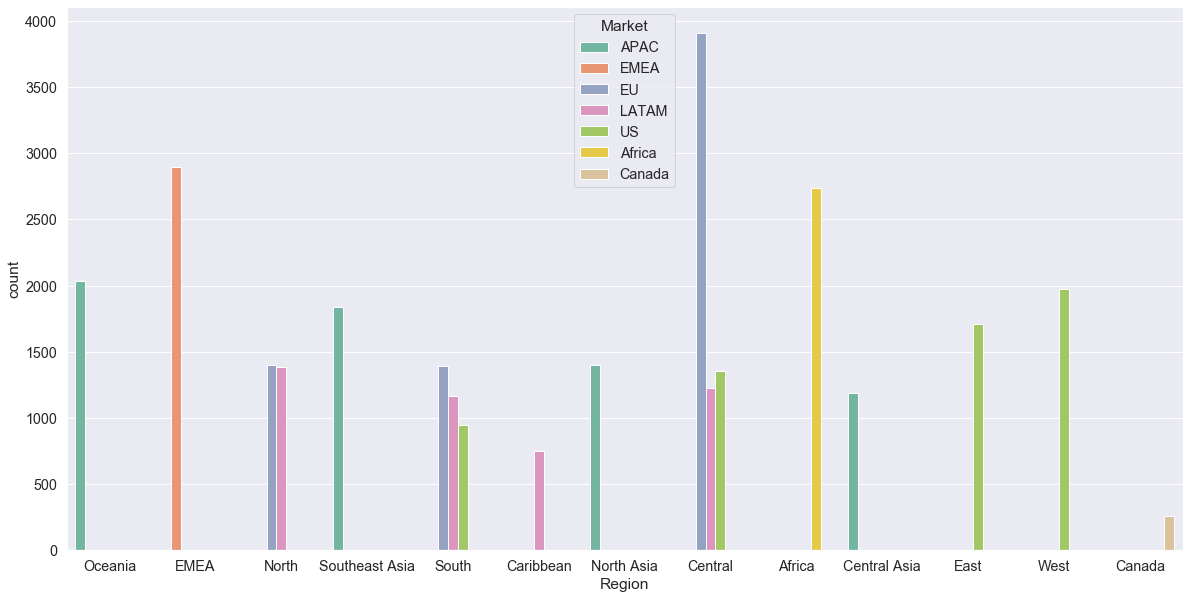

In [40]:
sns.set(rc={'figure.figsize': [20, 10]}, font_scale=1.3)
sns.countplot(x="Region" ,hue='Market', data=df, palette='Set2')

- **TopRegion : Central  (  6495 )**
 - market  =>  EU (   European Union  )   ,   LATAM ( Latin america )   ,  US => United States 

- **lowRegion : Canada**            
 - market  =>   Canada (  261 )

### StateName

In [41]:
# top 20 States 
print('- Number of States => ', + df['StateName'].nunique())
df.groupby(['StateName']).describe(include='all')['Country'][['count','top']].sort_values(ascending=False,by='count').head(20)

- Number of States =>  962


,count,top
StateName,,
California,1266,United States
England,980,United Kingdom
New York,723,United States
Ile-de-France,647,France
Texas,556,United States
North Rhine-Westphalia,480,Germany
New South Wales,461,Australia
Queensland,401,Australia
San Salvador,372,El Salvador


# --------------------------------------------------------------------------------------------------------------
## BusinessType

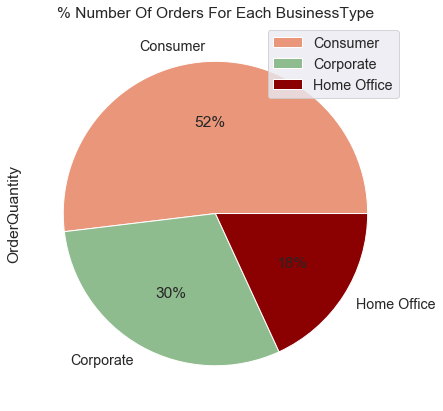

In [42]:
# heck Number Of Orders For Each BusinessType
sns.set(rc={'figure.figsize': [10, 7]}, font_scale=1.3)
df.groupby(['BusinessType']).sum().plot(kind='pie', y='OrderQuantity', autopct='%1.0f%%'
                                        , colors=['DarkSalmon','DarkSeaGreen','DarkRed']
                                        ,title='% Number Of Orders For Each BusinessType')

- Consumer       15290
- Corporate       8917
- Home Office     5359

# ------------------------------------------------------------------------------------------------------------
## Data cleaning

In [43]:
df.isna().sum()

SalesOrderNumber       0
OrderDate              0
DeliveryDate         170
ShipMode               0
CustomerKey            0
ProductKey          6890
CategoryName           0
SubcategoryName        0
ProductName            0
UnitPrice             25
OrderQuantity          0
Discount %             0
ShippingCost           0
OrderPriority         58
Customer             433
StateName            433
Country              433
Region               433
Market               433
BusinessType         433
dtype: int64

#### - ProductKey It contains a lot of missing values and it's unnecessary column so i will drop it
#### - Check for country , region , BusinessType , StateName and if i found they have the same rows contains missing values i will drop it 

In [44]:
# drop unnecessary columns (CustomerKey,ProductKey) ,
#(CustomerKey) => customers don't have the same customer key or the same country
df.drop(['CustomerKey','ProductKey','Customer'],axis=1,inplace=True)

In [45]:
#  Check for country , region , BusinessType , StateName and if i found they have the same rows contains missing values
ids=df[df['StateName'].isnull()][['StateName','Country','Region','Market','BusinessType']]
ids


,StateName,Country,Region,Market,BusinessType
7721,NaN,NaN,NaN,NaN,NaN
7725,NaN,NaN,NaN,NaN,NaN
7727,NaN,NaN,NaN,NaN,NaN
7728,NaN,NaN,NaN,NaN,NaN
7729,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
29814,NaN,NaN,NaN,NaN,NaN
29815,NaN,NaN,NaN,NaN,NaN
29816,NaN,NaN,NaN,NaN,NaN
29817,NaN,NaN,NaN,NaN,NaN


In [46]:
# check for index
ids=df[df['StateName'].isnull()][['StateName','Country','Region','Market','BusinessType']].index
ids

Int64Index([ 7721,  7725,  7727,  7728,  7729,  7730,  7731,  7732,  7733,
             7735,
            ...
            29809, 29810, 29811, 29812, 29813, 29814, 29815, 29816, 29817,
            29819],
           dtype='int64', length=433)

In [47]:
# they have the same missing values
df.drop(ids,axis=0,inplace=True)

In [48]:
# check for missing values
df.isna().sum()

SalesOrderNumber      0
OrderDate             0
DeliveryDate        170
ShipMode              0
CategoryName          0
SubcategoryName       0
ProductName           0
UnitPrice            25
OrderQuantity         0
Discount %            0
ShippingCost          0
OrderPriority        58
StateName             0
Country               0
Region                0
Market                0
BusinessType          0
dtype: int64

# -------------------------------------------------------------------------------------------------------------
### handling outlier

In [49]:
# handdling outliers
from datasist.structdata import detect_outliers
outliers_indices = detect_outliers(df, 0,['UnitPrice','OrderQuantity','ShippingCost'])
df.loc[outliers_indices].head()

,SalesOrderNumber,OrderDate,DeliveryDate,ShipMode,CategoryName,SubcategoryName,ProductName,UnitPrice,OrderQuantity,Discount %,ShippingCost,OrderPriority,StateName,Country,Region,Market,BusinessType
109,IT-2017-1978668,2017-02-16,2017-02-19,Second Class,Furniture,Chairs,"SAFCO Executive Leather Armchair, Black",459.00,11,0.0,506.270,Medium,Midi-Pyrénées,France,Central,EU,Corporate
133,ID-2017-72894,2017-02-28,2017-03-03,First Class,Furniture,Furnishings,"Eldon Door Stop, Black",50.16,10,0.2,108.340,Critical,Seoul,South Korea,North Asia,APAC,Home Office
177,CA-2017-111871,2017-03-18,2017-03-21,Second Class,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,140.98,10,0.8,218.620,Critical,California,United States,West,US,Home Office
303,MX-2017-134705,2017-05-04,2017-05-08,Standard Class,Furniture,Tables,"Hon Wood Table, with Bottom Storage",354.22,10,0.5,5.817,High,San Salvador,El Salvador,Central,LATAM,Consumer
383,CA-2017-124429,2017-05-27,2017-05-27,Same Day,Furniture,Tables,KI Conference Tables,70.89,10,0.0,11.182,High,California,United States,West,US,Corporate


### to much to drop 6029  from data 

In [50]:
def filter_IQR(df,column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    
    print(f" ---- {column_name} ----- ")

    print(f" First Quartile Q1: {Q1}  ")
    print(f" Third Quartile Q3:  {Q3} ")
    print(f"the IQR range: {IQR} \n")
    
    print(f"lenght of data before filtering is  {len(df)} ")
    lower_range = Q1 - 2.5 * IQR
    upper_range = Q3 + 2.5 * IQR
    
    filtered = df[df[column_name].between(lower_range , upper_range)]
    print(f"lenght of data after filtering is  {len(filtered)}\n ")
    
    return filtered.index.tolist()

index_set = set(df.index.tolist())
for col in ['UnitPrice','OrderQuantity','ShippingCost']:
    index_set = set(filter_IQR(df , col)).intersection(index_set)

df=df.loc[index_set]
df

 ---- UnitPrice ----- 
 First Quartile Q1: 15.75  
 Third Quartile Q3:  81.96 
the IQR range: 66.21 

lenght of data before filtering is  29566 
lenght of data after filtering is  27183
 
 ---- OrderQuantity ----- 
 First Quartile Q1: 2.0  
 Third Quartile Q3:  5.0 
the IQR range: 3.0 

lenght of data before filtering is  29566 
lenght of data after filtering is  29403
 
 ---- ShippingCost ----- 
 First Quartile Q1: 3.62  
 Third Quartile Q3:  27.15 
the IQR range: 23.529999999999998 

lenght of data before filtering is  29566 
lenght of data after filtering is  27214
 


,SalesOrderNumber,OrderDate,DeliveryDate,ShipMode,CategoryName,SubcategoryName,ProductName,UnitPrice,OrderQuantity,Discount %,ShippingCost,OrderPriority,StateName,Country,Region,Market,BusinessType
0,IN-2017-47883,2017-01-01,2017-01-08,Standard Class,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",25.26,5,0.5,11.92,Medium,New South Wales,Australia,Oceania,APAC,Consumer
1,IZ-2017-4680,2017-01-03,2017-01-07,Standard Class,Furniture,Chairs,"Novimex Swivel Stool, Set of Two",166.71,4,0.6,9.81,High,Ninawa,Iraq,EMEA,EMEA,Corporate
2,ID-2017-80230,2017-01-03,2017-01-09,Standard Class,Furniture,Chairs,"SAFCO Chairmat, Black",57.39,2,0.2,8.30,Low,Auckland,New Zealand,Oceania,APAC,Consumer
3,ID-2017-80230,2017-01-03,2017-01-09,Standard Class,Furniture,Chairs,"Hon Rocking Chair, Set of Two",132.87,2,0.0,9.63,Low,Auckland,New Zealand,Oceania,APAC,Consumer
4,ES-2017-4869686,2017-01-03,2017-01-07,Standard Class,Furniture,Bookcases,"Dania Corner Shelving, Traditional",122.07,7,0.6,12.56,Medium,England,United Kingdom,North,EU,Consumer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,ID-2020-63864,2020-12-30,NaT,Standard Class,Office Supplies,Supplies,"Elite Shears, Easy Grip",48.63,2,0.7,3.25,Medium,National Capital,Philippines,Southeast Asia,APAC,Consumer
29995,PL-2020-1210,2020-12-30,NaT,Standard Class,Office Supplies,Supplies,"Kleencut Trimmer, Steel",40.83,6,0.0,34.18,Medium,Lodz,Poland,EMEA,EMEA,Corporate
29996,MX-2020-110527,2020-12-31,NaT,Second Class,Office Supplies,Supplies,"Kleencut Ruler, High Speed",9.04,8,0.5,10.75,Medium,Managua,Nicaragua,Central,LATAM,Consumer
29997,ES-2020-2815584,2020-12-31,NaT,Standard Class,Office Supplies,Supplies,"Kleencut Shears, Serrated",43.47,6,0.7,3.67,High,North Rhine-Westphalia,Germany,Central,EU,Consumer


In [51]:
round(df.describe(),2)

,UnitPrice,OrderQuantity,Discount %,ShippingCost
count,25658.00,25658.00,25658.00,25658.00
mean,46.50,3.35,0.39,14.47
std,47.59,2.12,0.26,16.92
min,1.39,1.00,0.00,0.00
25%,14.55,2.00,0.20,3.21
50%,29.37,3.00,0.40,7.72
75%,53.73,4.00,0.60,18.74
max,244.56,12.00,0.80,85.97


- ***UnitPrice Mean -> 46.50 , max -> 244.56 , min -> 1.39 about 50% of UnitPrice between 14.55 and 53.73***
- ***OrderQuantity Mean -> 3 , max -> 12 , min -> 1 about 50% of OrderQuantity between 2 and 4***
- ***ShippingCost Mean -> 16.92, max -> 1581.51 , min -> 0 about 50% of OrderQuantity between 3.21 and 18.73**

In [52]:
# check for missing values after handling outliers
df.isna().sum()

SalesOrderNumber      0
OrderDate             0
DeliveryDate        148
ShipMode              0
CategoryName          0
SubcategoryName       0
ProductName           0
UnitPrice             0
OrderQuantity         0
Discount %            0
ShippingCost          0
OrderPriority        52
StateName             0
Country               0
Region                0
Market                0
BusinessType          0
dtype: int64

#### missing values in unitprice drop when processing outliers

# -------------------------------------------------------------------------------------------------------------
## Some feature engineering

### - Profit

In [53]:
# extract profit from UnitPrice,OrderQuantity,Discount,ShippingCost
df['Profit'] = ((df['UnitPrice'] * df['OrderQuantity']) * (100-df['Discount %']))/100 + df['ShippingCost']
df.head()

,SalesOrderNumber,OrderDate,DeliveryDate,ShipMode,CategoryName,SubcategoryName,ProductName,UnitPrice,OrderQuantity,Discount %,ShippingCost,OrderPriority,StateName,Country,Region,Market,BusinessType,Profit
0,IN-2017-47883,2017-01-01,2017-01-08,Standard Class,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",25.26,5,0.5,11.92,Medium,New South Wales,Australia,Oceania,APAC,Consumer,137.58850
1,IZ-2017-4680,2017-01-03,2017-01-07,Standard Class,Furniture,Chairs,"Novimex Swivel Stool, Set of Two",166.71,4,0.6,9.81,High,Ninawa,Iraq,EMEA,EMEA,Corporate,672.64896
2,ID-2017-80230,2017-01-03,2017-01-09,Standard Class,Furniture,Chairs,"SAFCO Chairmat, Black",57.39,2,0.2,8.30,Low,Auckland,New Zealand,Oceania,APAC,Consumer,122.85044
3,ID-2017-80230,2017-01-03,2017-01-09,Standard Class,Furniture,Chairs,"Hon Rocking Chair, Set of Two",132.87,2,0.0,9.63,Low,Auckland,New Zealand,Oceania,APAC,Consumer,275.37000
4,ES-2017-4869686,2017-01-03,2017-01-07,Standard Class,Furniture,Bookcases,"Dania Corner Shelving, Traditional",122.07,7,0.6,12.56,Medium,England,United Kingdom,North,EU,Consumer,861.92306


In [54]:
# total Profit
round(df['Profit'].sum(),2)

4181196.65

In [55]:
# Most profitable Subcategory
round(df.groupby('SubcategoryName').sum()[['Profit']].sort_values(ascending= False,by='Profit'),2)

,Profit
SubcategoryName,
Storage,970611.42
Chairs,720776.66
Bookcases,537625.55
Art,411304.16
Furnishings,391452.20
Binders,369122.53
Paper,275575.41
Supplies,225657.75
Appliances,196553.41


### the best selling subcategory is Storage 970319.80

In [56]:
# top 10 profitable countries
round(df.groupby(['Country']).sum()[['Profit']].sort_values(ascending=False,by='Profit').head(10),2)

,Profit
Country,
United States,727081.42
France,314521.91
Australia,276670.58
Germany,241096.66
Mexico,189955.33
China,188325.26
United Kingdom,164736.71
India,148724.65
Italy,130770.18


In [57]:
# check for the worst countries 
df.groupby(['Country']).sum()[['Profit']].sort_values(ascending=False,by='Profit').tail(10)

,Profit
Country,
Montenegro,278.51340
Central African Republic,266.21990
Lebanon,260.20609
Guinea-Bissau,207.29396
Mauritania,193.59903
Macedonia,193.03068
Armenia,171.98088
Slovenia,157.96948
Lesotho,156.66304


In [58]:
# check for the highest avarage profit for countries
df.groupby(['Country']).describe()['Profit'][['mean','count']].sort_values(by=['mean'],ascending=False).head()

,mean,count
Country,,
Chad,659.506540,2.0
Philippines,229.648934,339.0
Japan,229.631025,117.0
South Korea,224.635240,86.0
Thailand,220.534375,159.0


#### - Number One in average profit is Chad but this number is fake because the number of people who bought only 2

In [59]:
# check  for countries
df.groupby(['Country']).describe()['Profit'][['mean','count']].sort_values(by=['count'],ascending=False).head()

,mean,count
Country,,
United States,137.185174,5300.0
France,193.314023,1627.0
Australia,203.135519,1362.0
Germany,198.924633,1212.0
Mexico,157.117729,1209.0


#### - United States Not number one in average profit but number one in sales

### - ShipDays

In [60]:
# Calculate the number of days between two dates and make a new column 
from datetime import date
def time_difference(o,d):
    OrderDate=df['OrderDate']
    DeliveryDate=df['DeliveryDate']
    time= DeliveryDate - OrderDate 
    return time

In [61]:
# Extract ShipDays from two datetime
df['ShipDays']=time_difference(df['OrderDate'],df['DeliveryDate']).dt.days

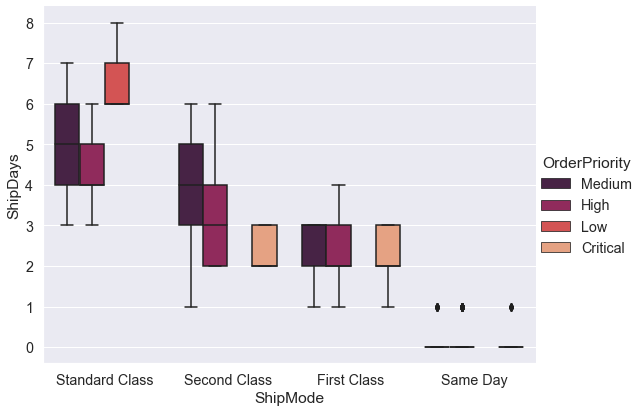

In [62]:
sns.catplot(x="ShipMode", y="ShipDays", kind="box",hue='OrderPriority', data=df, height=6, aspect=1.3,palette='rocket')

### The relationship between OrderPriority , ShipMode and calculate ShipDays between them 
 - **Standard Class Delivery occurs:**
   - Medium -->  between 3 and 8 days 
   - High --> between 2 and 6 days 
   - low --> between 6 and 8 days 
 - **Second Class Delivery occurs :**
  - Medium --> between 1 and 6 days 
  - High --> between 2 and 6 days 
  - Critical --> between 2 and 3 days 

 - **First Class Delivery occurs :**
   - Medium --> between 1 and 3 days 
   - High --> between 1 and 4 days 
   - Critical --> between 1 and 3 days 
 - **Same Day Delivery occurs :**
   - Medium , High , Critical --> between 0 and 1 day 

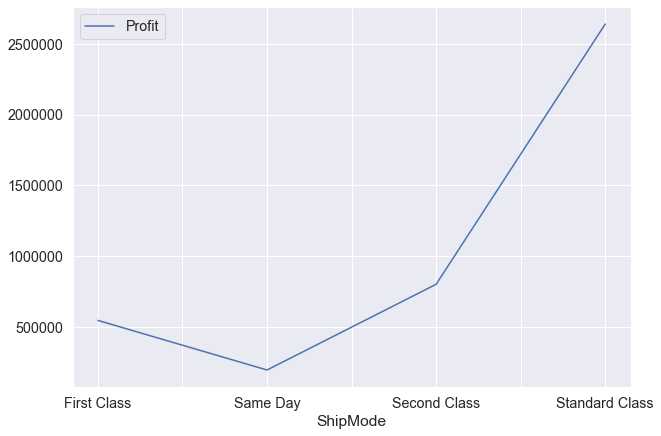

In [63]:
df.groupby('ShipMode').sum()[['Profit']].plot(legend=True)

In [64]:
# check for ship days dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25658 entries, 0 to 29998
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   SalesOrderNumber  25658 non-null  object        
 1   OrderDate         25658 non-null  datetime64[ns]
 2   DeliveryDate      25510 non-null  datetime64[ns]
 3   ShipMode          25658 non-null  object        
 4   CategoryName      25658 non-null  object        
 5   SubcategoryName   25658 non-null  object        
 6   ProductName       25658 non-null  object        
 7   UnitPrice         25658 non-null  float64       
 8   OrderQuantity     25658 non-null  int64         
 9   Discount %        25658 non-null  float64       
 10  ShippingCost      25658 non-null  float64       
 11  OrderPriority     25606 non-null  object        
 12  StateName         25658 non-null  object        
 13  Country           25658 non-null  object        
 14  Region            2565

**Problems**
-  dtype of ShipDays is float because consists NAN (float)
-  missing value in ShipDays because we have missing value in DeliveryDate 

In [65]:
# solve this problem
# drop missing values in DeliveryDate
df.dropna(axis=0,subset=['OrderDate','DeliveryDate'],inplace=True)
# change dtype for shipdays to int after drop missing values in DeliveryDate 
df['ShipDays']=df['ShipDays'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25510 entries, 0 to 29993
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   SalesOrderNumber  25510 non-null  object        
 1   OrderDate         25510 non-null  datetime64[ns]
 2   DeliveryDate      25510 non-null  datetime64[ns]
 3   ShipMode          25510 non-null  object        
 4   CategoryName      25510 non-null  object        
 5   SubcategoryName   25510 non-null  object        
 6   ProductName       25510 non-null  object        
 7   UnitPrice         25510 non-null  float64       
 8   OrderQuantity     25510 non-null  int64         
 9   Discount %        25510 non-null  float64       
 10  ShippingCost      25510 non-null  float64       
 11  OrderPriority     25459 non-null  object        
 12  StateName         25510 non-null  object        
 13  Country           25510 non-null  object        
 14  Region            2551

### Year , Month , Day , Season

In [66]:
# extract features from datetime
df['Year'] = df['OrderDate'].dt.year
df['Month_num'] = df['OrderDate'].dt.month
df['Month'] = df['OrderDate'].dt.month_name()
df['Day'] = df['OrderDate'].dt.day_name()
df['Week_Day'] = df['OrderDate'].dt.weekday
df['Quarter']= df['OrderDate'].dt.quarter

def map_months(x):
    if x in ['December', 'January', 'February']:
        return 'Winter'
    elif x in ['March', 'April', 'May']:
        return 'Spring'
    elif x in ['June','July', 'August']:
        return 'Summer'
    elif x in ['September', 'October', 'November']:
        return 'Autumn'
    
df['Season']=df['Month'].apply(map_months)

### Year

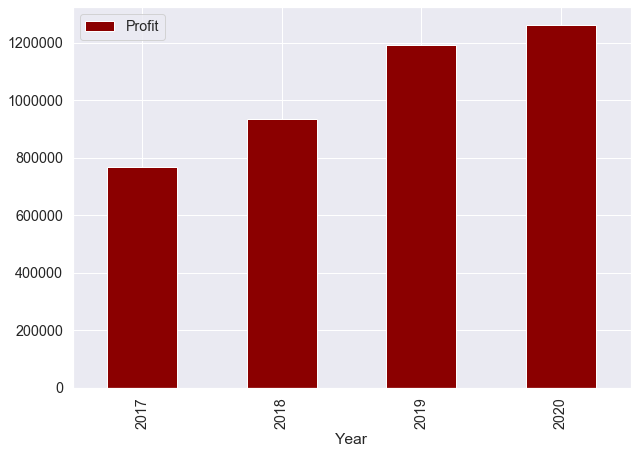

In [67]:
# check profit for each year
groups=df.groupby('Year').sum()[['Profit']]
groups.plot.bar(color="DarkRed")
plt.show()

**The profits are increasing every year, and the best year is 2020**

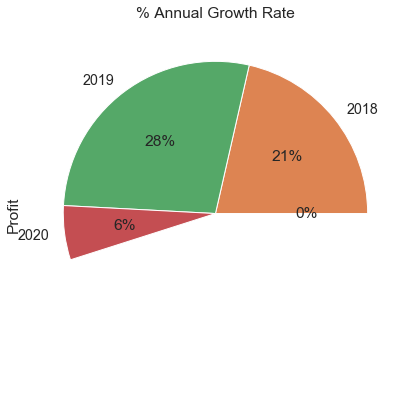

In [68]:
# check for % Annual Growth Rate
df.groupby(['Year']).sum().Profit.pct_change().plot(kind='pie', y='OrderQuantity', autopct='%1.0f%%'
                                        ,title='% Annual Growth Rate')

- **Growth rate in 2018 for 2017 - 21%**
- **Growth rate in 2019 for 2018 and 2017 - 49%**
- **Growth rate in 2020 for 2019, 2018 and 2017 - 57%**

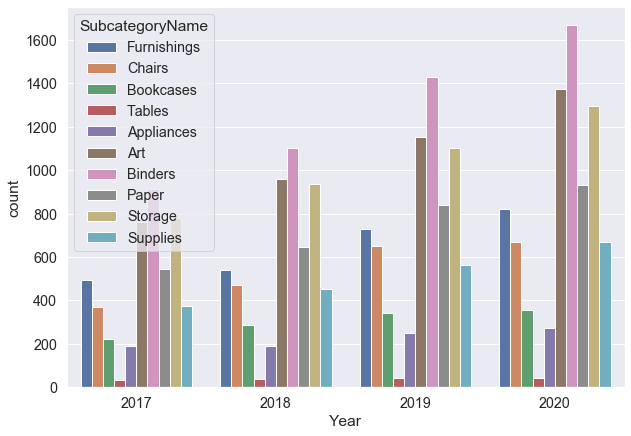

In [69]:
# shows best and worst SubcategoryName for each year
sns.countplot(x="Year" ,hue='SubcategoryName', data=df)

###  - it's noticed every year Binders , Art , Storage they are the best subcategories It's sold , With the difference in sales every year 

###  - And the other subcategories like:  Bookcases , Appliances , Tables , They are sold every year in very few       numbers compared to others  ==> This could be because there are problems in the product , Lack of good sales team or  no good marketing for these products

###  -  Furniture, chairs, supplies and paper in between them

In [70]:
# lets check for SalesOrderNumber that include < 4 products in year 2020
df[df['Year']== 2020]['SalesOrderNumber'].value_counts()[df[df['Year']== 2020]['SalesOrderNumber'].value_counts()< 4].index

Index(['PL-2020-9550', 'MX-2020-168956', 'TU-2020-1990', 'ES-2020-4789132',
       'NI-2020-2710', 'ES-2020-5291112', 'ES-2020-2200615', 'ES-2020-4251554',
       'CA-2020-111332', 'ES-2020-1114603',
       ...
       'ID-2020-54239', 'IR-2020-4860', 'ES-2020-5225520', 'NI-2020-3100',
       'IT-2020-4038519', 'CA-2020-9080', 'IN-2020-78438', 'ID-2020-17279',
       'HR-2020-4050', 'AJ-2020-9620'],
      dtype='object', length=4888)

### - This is the sales order number that < 4 product was ordered in 2020, we can give them more offers like buy two get one free and discounts to make a good relationship with them, but there should be more columns with more Details about customers such as email, number, age, gender, so you can communicate with them

In [71]:
# lets check for SalesOrderNumber that include more than or = 5 products in year 2020
df[df['Year']== 2020]['SalesOrderNumber'].value_counts()[df[df['Year']== 2020]['SalesOrderNumber'].value_counts()>=5].index

Index(['MX-2020-136539', 'IT-2020-4272173', 'ES-2020-5605089', 'NI-2020-8880',
       'IT-2020-2009199', 'MO-2020-8000', 'TU-2020-40', 'ES-2020-2896926',
       'IN-2020-15263', 'ES-2020-4875323',
       ...
       'MX-2020-166254', 'ES-2020-3412389', 'IN-2020-19274', 'CA-2020-131954',
       'ES-2020-5160909', 'MX-2020-113397', 'CA-2020-112515',
       'ES-2020-5247585', 'ES-2020-2015673', 'IT-2020-2122369'],
      dtype='object', length=105)

### - This is the sales order number that contains >=5  products was ordered in 2020, make a good relationship by Inform them of the advantages of other products by sending gifts and making discounts on these product to make a good relationship with them

### Season

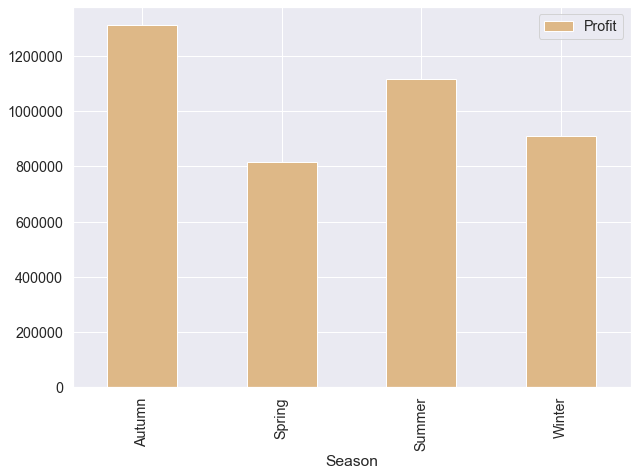

In [72]:
# check for best profitable season
groups=df.groupby('Season').sum()[['Profit']]
groups.plot.bar(color="BurlyWood")
plt.show()

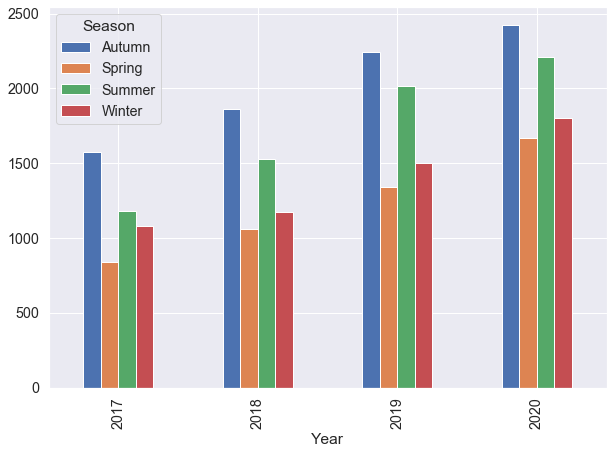

In [73]:
# check for the best Season sales for each year 
pd.crosstab(df['Year'],df['Season']).plot.bar()

### - top sales in Autumn for every year 
### -  least sales in winter and summer-> so there should be more marketing, offers, and discounts in summer and winter to increase sales and profits by knowing the least selling products in this season and working to know people about these products.

### Month

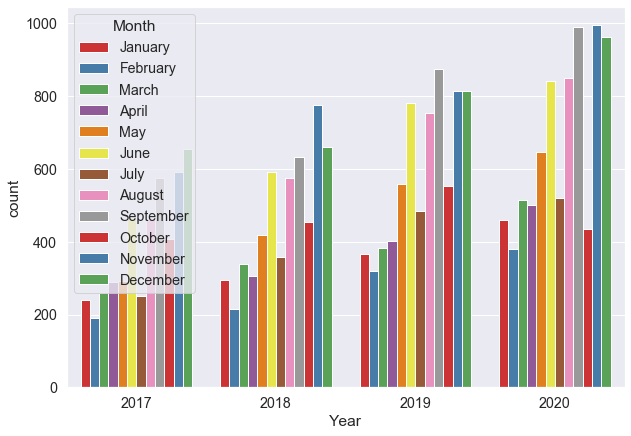

In [74]:
# The best month of every year contains sales
sns.countplot(x="Year" ,hue='Month', data=df,palette='Set1')

## The best month of every year
##                   ⇩

In [75]:
df.groupby('Year').describe(include='all')['Month'][['top','count','freq']]

,top,count,freq
Year,,,
2017,December,4677,654
2018,November,5622,776
2019,September,7107,875
2020,November,8104,996


## Day

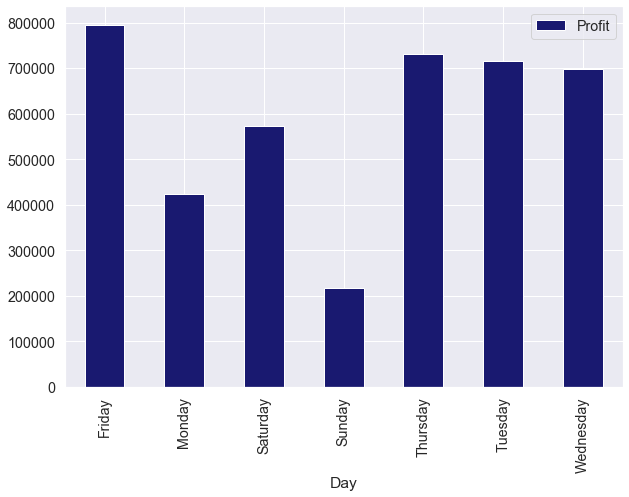

In [76]:
# check for the most profitable day 
groups=df.groupby('Day').sum()[['Profit']]
groups.plot.bar(color="MidnightBlue")
plt.show()

- Friday       796246.06
- Thursday     736479.14
- Tuesday      725760.30
- Wednesday    705890.40
- Saturday     573161.61
- Monday       423970.16
- Sunday       218235.69

### - the best profit in fridays 
### - and decrease in mondays and sundays --> In order to increase sales and profit these days, more offers must be made and a good relationship with customers should be established by increasing the percentage of discounts, reducing the cost of shipping, and making more discounts for customers who bring other customers .

# --------------------------------------------------------------------------------------------------------------
## Time Series Analysis

In [77]:
# make pivot table Shows the profits for each country each year from 2017 to 2020
pivot=pd.pivot_table(df,index=['Country'], columns='Year', values= 'Profit').sort_values(ascending=False, by= [2020])
pivot

Year,2017,2018,2019,2020
Country,,,,
Martinique,126.050500,50.510560,170.979140,523.306000
Liberia,88.795613,39.262710,NaN,321.917920
Ireland,178.687550,202.126469,131.467193,254.191569
Bangladesh,177.243085,114.637224,250.193294,242.360783
Thailand,170.509732,173.623737,310.772399,231.731599
...,...,...,...,...
Lebanon,46.197005,NaN,83.906040,NaN
Lesotho,156.663040,NaN,NaN,NaN
Slovenia,NaN,NaN,157.969480,NaN


#### - Nan values means there are no profit or sale in this year

#### - best profit in 2020 -> Martinique --> 523.31

In [78]:
# check for countries that there are no profit in 2017
pivot[pivot[2017].isnull()]

Year,2017,2018,2019,2020
Country,,,,
Trinidad and Tobago,NaN,90.132720,150.486760,182.946184
Argentina,NaN,96.294300,168.927074,182.681465
Venezuela,NaN,NaN,110.702666,146.626514
Guinea,NaN,78.008120,32.677415,141.241264
Montenegro,NaN,NaN,NaN,139.256700
Gabon,NaN,128.747400,NaN,136.424387
Macedonia,NaN,NaN,56.822840,136.207840
Syria,NaN,119.928693,95.627411,118.239516
Papua New Guinea,NaN,130.873190,192.719689,93.478090


In [79]:
# check for countries that there are no profit in 2018
pivot[pivot[2018].isnull()]

Year,2017,2018,2019,2020
Country,,,,
Republic of the Congo,185.169300,NaN,NaN,221.635790
Venezuela,NaN,NaN,110.702666,146.626514
Montenegro,NaN,NaN,NaN,139.256700
Macedonia,NaN,NaN,56.822840,136.207840
United Arab Emirates,277.075100,NaN,305.177033,127.801656
Estonia,NaN,NaN,138.268287,62.171642
Taiwan,135.921500,NaN,430.173990,54.574000
Paraguay,NaN,NaN,141.417720,50.366410
Hong Kong,372.618560,NaN,154.846064,40.254765


In [80]:
# check for countries that there are no profit in 2020
pivot[pivot[2019].isnull()]

Year,2017,2018,2019,2020
Country,,,,
Liberia,88.795613,39.262710,NaN,321.917920
Republic of the Congo,185.169300,NaN,NaN,221.635790
Albania,65.848270,60.897710,NaN,151.460000
Montenegro,NaN,NaN,NaN,139.256700
Gabon,NaN,128.747400,NaN,136.424387
Slovakia,116.672988,37.363060,NaN,111.269960
Barbados,56.862440,69.474587,NaN,102.413307
Bosnia and Herzegovina,396.324000,57.628100,NaN,98.514524
Sierra Leone,309.085600,220.026960,NaN,63.576700


In [81]:
# check for countries that there are no profit in 2020
pivot[pivot[2020].isnull()]

Year,2017,2018,2019,2020
Country,,,,
Armenia,73.745800,NaN,24.489280,NaN
Burundi,56.025100,228.330860,NaN,NaN
Central African Republic,92.850000,73.309060,26.751780,NaN
Chad,NaN,NaN,659.506540,NaN
Djibouti,159.066983,NaN,144.015393,NaN
Eritrea,NaN,NaN,19.012180,NaN
Guadeloupe,NaN,72.081860,268.742010,NaN
Lebanon,46.197005,NaN,83.906040,NaN
Lesotho,156.663040,NaN,NaN,NaN


In [82]:
# drop countries that have nan in any year To show the countries that have profits each year
pivot.dropna(inplace=True)
# show new pivot table 
pivot

Year,2017,2018,2019,2020
Country,,,,
Martinique,126.050500,50.510560,170.979140,523.306000
Ireland,178.687550,202.126469,131.467193,254.191569
Bangladesh,177.243085,114.637224,250.193294,242.360783
Thailand,170.509732,173.623737,310.772399,231.731599
Netherlands,202.856650,174.863606,225.373806,228.577590
...,...,...,...,...
Niger,100.836740,136.144097,175.044450,68.842007
Jamaica,74.332300,132.760000,158.290718,64.815920
Somalia,41.572223,43.031743,117.041485,56.731378


### - These are the countries that have profits every year and they are 94 countries from 133 , which means there are 39 countries that have no profits every year.

# missing values

In [83]:
# drop missing value in order pirorty
df.dropna(inplace=True)
# check for missing values
df.isna().sum()

SalesOrderNumber    0
OrderDate           0
DeliveryDate        0
ShipMode            0
CategoryName        0
SubcategoryName     0
ProductName         0
UnitPrice           0
OrderQuantity       0
Discount %          0
ShippingCost        0
OrderPriority       0
StateName           0
Country             0
Region              0
Market              0
BusinessType        0
Profit              0
ShipDays            0
Year                0
Month_num           0
Month               0
Day                 0
Week_Day            0
Quarter             0
Season              0
dtype: int64

In [84]:
# save this dataset in a new excel sheet to show dashboard
df.to_excel('furniture_dashboardlast.xlsx')

# -------------------------------------------------------------------------------------------------------------
### Work with Categorical Data

In [85]:
# import OrdinalEncoder to convert ordinal data to numbers
from category_encoders import OrdinalEncoder
# make mapper OrderPriority, ShipMode
OrderPriority= {'Low': 0, 'Medium': 1, 'High': 2, 'Critical': 3}
ShipMode={'Same Day': 0, 'First Class': 1, 'Second Class': 2, 'Standard Class': 3}

mapping=[{'col': 'OrderPriority','mapping': OrderPriority},{'col': 'ShipMode','mapping' : ShipMode}]

# creating an instance of labelencoder
ordinal_enc= OrdinalEncoder(cols=['OrderPriority','ShipMode'], mapping=mapping)
df= ordinal_enc.fit_transform(df)
df

,SalesOrderNumber,OrderDate,DeliveryDate,ShipMode,CategoryName,SubcategoryName,ProductName,UnitPrice,OrderQuantity,Discount %,...,BusinessType,Profit,ShipDays,Year,Month_num,Month,Day,Week_Day,Quarter,Season
0,IN-2017-47883,2017-01-01,2017-01-08,3,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",25.26,5,0.5,...,Consumer,137.58850,7,2017,1,January,Sunday,6,1,Winter
1,IZ-2017-4680,2017-01-03,2017-01-07,3,Furniture,Chairs,"Novimex Swivel Stool, Set of Two",166.71,4,0.6,...,Corporate,672.64896,4,2017,1,January,Tuesday,1,1,Winter
2,ID-2017-80230,2017-01-03,2017-01-09,3,Furniture,Chairs,"SAFCO Chairmat, Black",57.39,2,0.2,...,Consumer,122.85044,6,2017,1,January,Tuesday,1,1,Winter
3,ID-2017-80230,2017-01-03,2017-01-09,3,Furniture,Chairs,"Hon Rocking Chair, Set of Two",132.87,2,0.0,...,Consumer,275.37000,6,2017,1,January,Tuesday,1,1,Winter
4,ES-2017-4869686,2017-01-03,2017-01-07,3,Furniture,Bookcases,"Dania Corner Shelving, Traditional",122.07,7,0.6,...,Consumer,861.92306,4,2017,1,January,Tuesday,1,1,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29984,ID-2020-76324,2020-12-25,2020-12-27,1,Office Supplies,Supplies,"Stiletto Scissors, Easy Grip",25.23,6,0.7,...,Consumer,165.42034,2,2020,12,December,Friday,4,4,Winter
29985,IN-2020-71886,2020-12-26,2020-12-31,3,Office Supplies,Supplies,"Fiskars Trimmer, Steel",41.70,2,0.7,...,Home Office,90.91620,5,2020,12,December,Saturday,5,4,Winter
29988,ES-2020-4917515,2020-12-27,2020-12-31,3,Office Supplies,Supplies,"Fiskars Shears, Steel",47.04,2,0.7,...,Home Office,99.69144,4,2020,12,December,Sunday,6,4,Winter
29989,IN-2020-77290,2020-12-29,2020-12-31,2,Office Supplies,Supplies,"Kleencut Box Cutter, Steel",34.05,7,0.2,...,Consumer,251.66330,2,2020,12,December,Tuesday,1,4,Winter


In [86]:
# drop SalesOrderNumber 1760
# we have 2432 product name 
# befor drop product name we have 3400 columns
# after drop product name we have 1149 columns
# drop month and day beaceuse we have month and day number
# drop statename 946 
df.drop(['SalesOrderNumber','Month','Day','StateName','ProductName'], axis=1,inplace= True)

In [87]:
# import OneHotEncoder to convert nominal data to 0 , 1
from category_encoders import OneHotEncoder
# select object dtypes 
cols=list(df.select_dtypes(include= object).columns)
OneHot_enc= OneHotEncoder(cols=cols,use_cat_names=True)
df= OneHot_enc.fit_transform(df)
df

,OrderDate,DeliveryDate,ShipMode,CategoryName_Furniture,CategoryName_Office Supplies,SubcategoryName_Furnishings,SubcategoryName_Chairs,SubcategoryName_Bookcases,SubcategoryName_Tables,SubcategoryName_Appliances,...,Profit,ShipDays,Year,Month_num,Week_Day,Quarter,Season_Winter,Season_Spring,Season_Summer,Season_Autumn
0,2017-01-01,2017-01-08,3,1,0,1,0,0,0,0,...,137.58850,7,2017,1,6,1,1,0,0,0
1,2017-01-03,2017-01-07,3,1,0,0,1,0,0,0,...,672.64896,4,2017,1,1,1,1,0,0,0
2,2017-01-03,2017-01-09,3,1,0,0,1,0,0,0,...,122.85044,6,2017,1,1,1,1,0,0,0
3,2017-01-03,2017-01-09,3,1,0,0,1,0,0,0,...,275.37000,6,2017,1,1,1,1,0,0,0
4,2017-01-03,2017-01-07,3,1,0,0,0,1,0,0,...,861.92306,4,2017,1,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29984,2020-12-25,2020-12-27,1,0,1,0,0,0,0,0,...,165.42034,2,2020,12,4,4,1,0,0,0
29985,2020-12-26,2020-12-31,3,0,1,0,0,0,0,0,...,90.91620,5,2020,12,5,4,1,0,0,0
29988,2020-12-27,2020-12-31,3,0,1,0,0,0,0,0,...,99.69144,4,2020,12,6,4,1,0,0,0
29989,2020-12-29,2020-12-31,2,0,1,0,0,0,0,0,...,251.66330,2,2020,12,1,4,1,0,0,0


# --------------------------------------------------------------------------------------------------------------
### Feature Scaling

In [88]:
# feature scaling for numerical data 
from sklearn.preprocessing import StandardScaler
columns= ['UnitPrice','OrderQuantity','Discount %','ShippingCost','Profit','ShipDays','Year','Month_num','Week_Day','Quarter']
scaler= StandardScaler ()
scaler.fit(df[columns])
scaler.transform(df[columns])
df[columns] = scaler.transform(df[columns])
df

,OrderDate,DeliveryDate,ShipMode,CategoryName_Furniture,CategoryName_Office Supplies,SubcategoryName_Furnishings,SubcategoryName_Chairs,SubcategoryName_Bookcases,SubcategoryName_Tables,SubcategoryName_Appliances,...,Profit,ShipDays,Year,Month_num,Week_Day,Quarter,Season_Winter,Season_Spring,Season_Summer,Season_Autumn
0,2017-01-01,2017-01-08,3,1,0,1,0,0,0,0,...,-0.127718,1.740437,-1.582106,-1.955967,1.884722,-1.667654,1,0,0,0
1,2017-01-03,2017-01-07,3,1,0,0,1,0,0,0,...,2.564062,0.003843,-1.582106,-1.955967,-1.041044,-1.667654,1,0,0,0
2,2017-01-03,2017-01-09,3,1,0,0,1,0,0,0,...,-0.201862,1.161572,-1.582106,-1.955967,-1.041044,-1.667654,1,0,0,0
3,2017-01-03,2017-01-09,3,1,0,0,1,0,0,0,...,0.565432,1.161572,-1.582106,-1.955967,-1.041044,-1.667654,1,0,0,0
4,2017-01-03,2017-01-07,3,1,0,0,0,1,0,0,...,3.516262,0.003843,-1.582106,-1.955967,-1.041044,-1.667654,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29984,2020-12-25,2020-12-27,1,0,1,0,0,0,0,0,...,0.012298,-1.153887,1.160190,1.373577,0.714416,1.161479,1,0,0,0
29985,2020-12-26,2020-12-31,3,0,1,0,0,0,0,0,...,-0.362517,0.582707,1.160190,1.373577,1.299569,1.161479,1,0,0,0
29988,2020-12-27,2020-12-31,3,0,1,0,0,0,0,0,...,-0.318371,0.003843,1.160190,1.373577,1.884722,1.161479,1,0,0,0
29989,2020-12-29,2020-12-31,2,0,1,0,0,0,0,0,...,0.446169,-1.153887,1.160190,1.373577,-1.041044,1.161479,1,0,0,0


# -------------------------------------------------------------------------------------------------------------